In [1]:
def c1addinst(distance,time,mass,dispersion,velocity,decay):
    import math
    term0 = math.exp(-1.0*decay*time)
    term1 = math.sqrt(4.0*math.pi*dispersion*time)
    term2 = math.exp(-((distance-velocity*time)**2)/(4.0*dispersion*time))
    c1addinst = term0*(mass/term1)*term2
    return(c1addinst)

In [2]:
import math
total_mass  = 1.0
area        = 10 
mass        = total_mass/area
velocity    = 1.0 #m/day
dispersivity = 1.0 #m
dispersion  = velocity*dispersivity #m^2/day
half_life  = 33 #years
decay = math.log(2)/(half_life)/365 #1/days
print("Mass : ",round(mass,3)," kg/m^3")
print("Decay constant : ",round(decay,6)," day^-1 ")
print("Dispersion : ",round(dispersion,3)," m^2/day")
#print(math.log(2))

Mass :  0.1  kg/m^3
Decay constant :  5.8e-05  day^-1 
Dispersion :  1.0  m^2/day


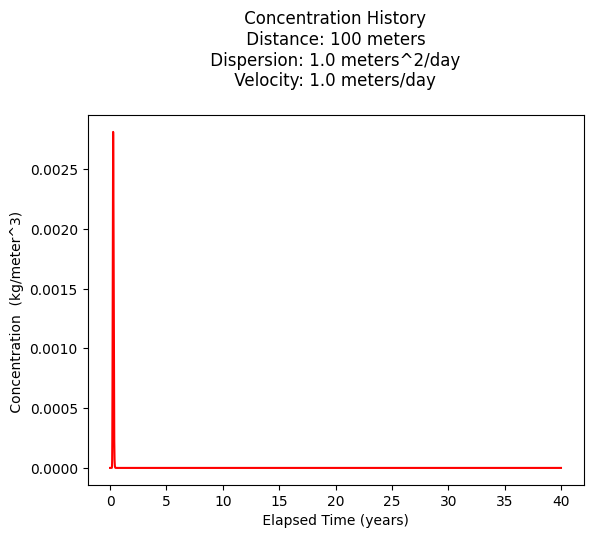

In [3]:
deltat      = (1.0) #days
howmany =     365*40/deltat 
howmany = int(howmany)

t = [] #days
for i in range(howmany):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
distance        = 100  #years as days

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c1addinst(distance,t[i],mass,dispersion,velocity,decay)

# rescale time into years
for i in range(howmany):
    t[i]=t[i]/365.
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(distance) + " meters \n" + " Dispersion: " + repr(dispersion) + " meters^2/day \n" + " Velocity: " + repr(velocity) + " meters/day \n") # caption the plot object
plt.xlabel(" Elapsed Time (years) ") # label x-axis
plt.ylabel(" Concentration  (kg/meter^3)      ") # label y-axis
#plt.plot([365,365],[0,c0])
#plt.plot([365*2,365*2],[0,c0])
#plt.text(365,100,"  year 1")
#plt.text(365*2,100,"  year 2")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Center of Distribution Position : ",round(time*velocity,2)," length units")

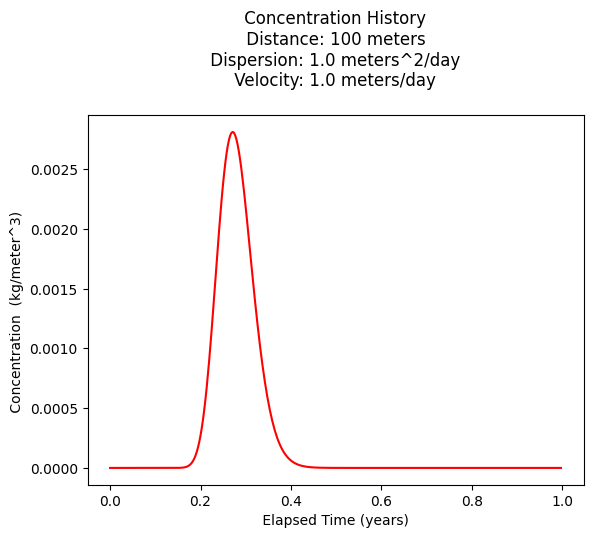

In [4]:
deltat      = (1.0) #days
howmany =     365*1/deltat 
howmany = int(howmany)

t = [] #days
for i in range(howmany):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
distance        = 100  #years as days

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c1addinst(distance,t[i],mass,dispersion,velocity,decay)

# rescale time into years
for i in range(howmany):
    t[i]=t[i]/365.
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(distance) + " meters \n" + " Dispersion: " + repr(dispersion) + " meters^2/day \n" + " Velocity: " + repr(velocity) + " meters/day \n") # caption the plot object
plt.xlabel(" Elapsed Time (years) ") # label x-axis
plt.ylabel(" Concentration  (kg/meter^3)      ") # label y-axis
#plt.plot([365,365],[0,c0])
#plt.plot([365*2,365*2],[0,c0])
#plt.text(365,100,"  year 1")
#plt.text(365*2,100,"  year 2")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Center of Distribution Position : ",round(time*velocity,2)," length units")

In [5]:
print("Maximum concentration : ",max(c)," kg/m^3")
print("          Observed at : ",t[c.index(max(c))]*365," days")
print(f"          C_max ~ {c1addinst(distance,t[c.index(max(c))]*365,mass,dispersion,velocity,decay):.4f} kg/m^3")


Maximum concentration :  0.0028119432286784715  kg/m^3
          Observed at :  99.0  days
          C_max ~ 0.0028 kg/m^3


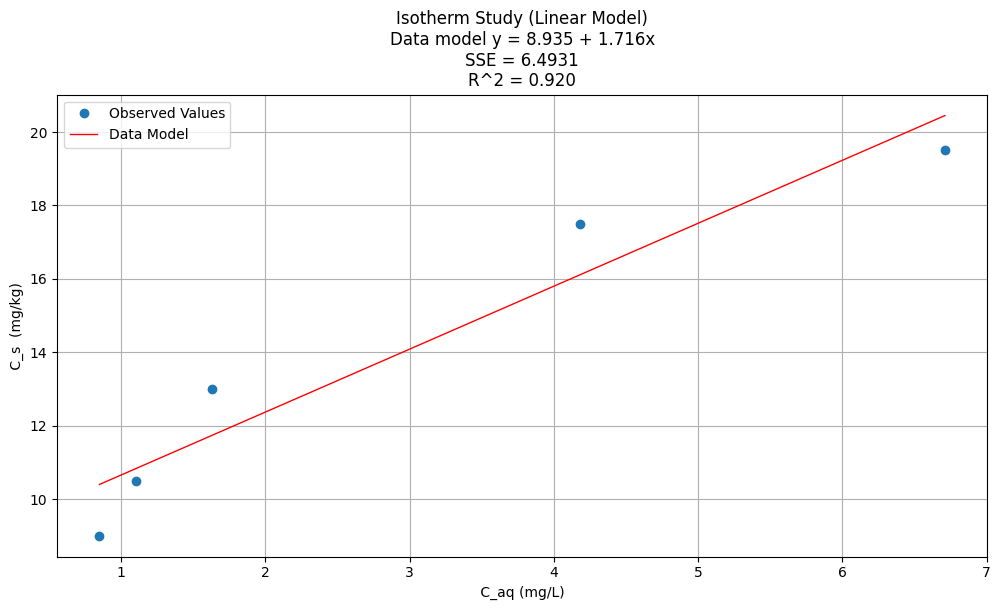

In [6]:
p5df = [[7.10 ,6.71],
[4.53 ,4.18],
[1.89 ,1.63],
[1.31 ,1.10],
[1.03 ,0.85]] 
howmanyrows = len(p5df)# allocate lists
c0=[0 for i in range(howmanyrows)]
cEq=[0 for i in range(howmanyrows)]
cS=[0 for i in range(howmanyrows)]
cSoS=[0 for i in range(howmanyrows)]
#input values
massS = 0.020 #kg
volL = 1 #L
# build lists
for i in range(howmanyrows):
    c0[i]=p5df[i][0]
    cEq[i]=p5df[i][1]
    cS[i]=(c0[i]-cEq[i])*volL/massS
    cSoS[i]=cEq[i]/cS[i]

# Now we need to do some analysis to earn our keep
# heres how to do the fits using python
#Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
import statsmodels.formula.api as smf # here is the regression package to fit lines
data = pd.DataFrame({'X':cEq, 'Y':cS}) # we use X,Y as column names for simplicity
#data.head()

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

# Predict values
y_pred = model.predict(data)

# Extract fitted coefficients
beta0 = model.params['Intercept']   # intercept
beta1 = model.params['X']           # slope

sse = model.ssr
rsq = model.rsquared



from matplotlib import pyplot as plt

titleline = (
    f"Isotherm Study (Linear Model)\n"
    f"Data model y = {beta0:.3f} + {beta1:.3f}x\n"
    f"SSE = {sse:.4f}\n"
    f"R^2 = {rsq:.3f}"
)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel(" C_aq (mg/L) ") # label x-axis
plt.ylabel(" C_s  (mg/kg) ") # label y-axis
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid(which="both")
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [7]:
data = pd.DataFrame({'X':cEq, 'Y':cS}) # we use X,Y as column names for simplicity
import math
data['lnX']=data['X'].apply(math.log)
data['lnY']=data['Y'].apply(math.log)
#data.head()

      X     Y       lnX       lnY       Ymod
0  6.71  19.5  1.903599  2.970414  20.324788
1  4.18  17.5  1.430311  2.862201  17.086669
2  1.63  13.0  0.488580  2.564949  12.097387
3  1.10  10.5  0.095310  2.351375  10.472862
4  0.85   9.0 -0.162519  2.197225   9.528125


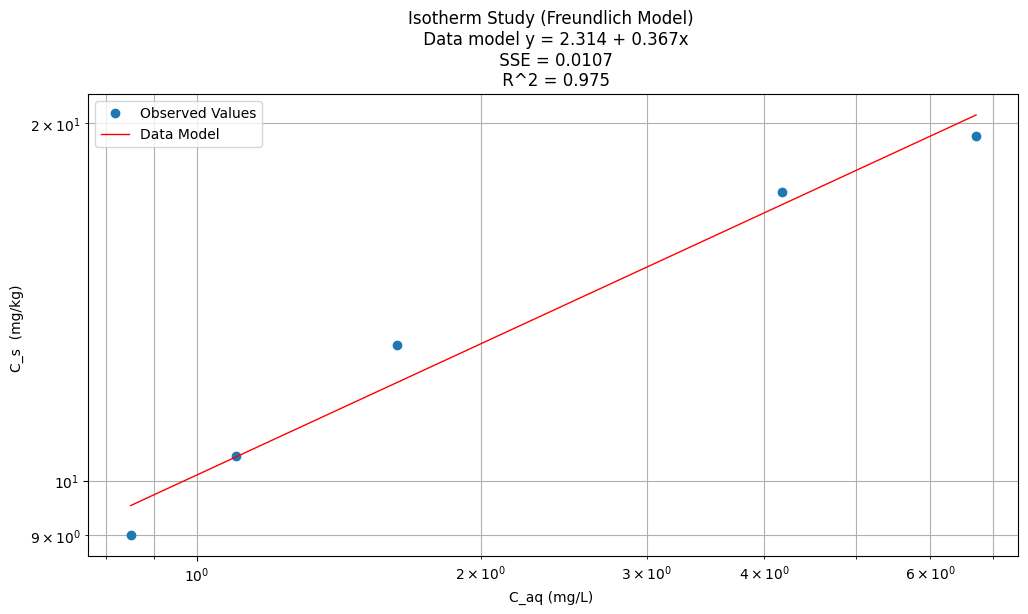

In [8]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('lnY ~ lnX', data=data) # model object constructor syntax
model = model.fit()

# Predict values
y_pred = model.predict(data)

beta0 = model.params.iloc[0] # the fitted intercept
beta1 = model.params.iloc[1]
sse = model.ssr
rsq = model.rsquared

data['Ymod']=math.exp(beta0)*(data['X']**beta1)
print(data.head())

titleline = "Isotherm Study (Freundlich Model) \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'],data['Ymod'], 'r', linewidth=1)   # regression line
plt.xlabel("C_aq (mg/L) ") # label x-axis
plt.ylabel("C_s  (mg/kg) ") # label y-axis
plt.yscale('log') # set y-axis to display a logarithmic scale #################
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid(which="both")
plt.show() # plot to stdio -- has to be last call as it kills prior objects

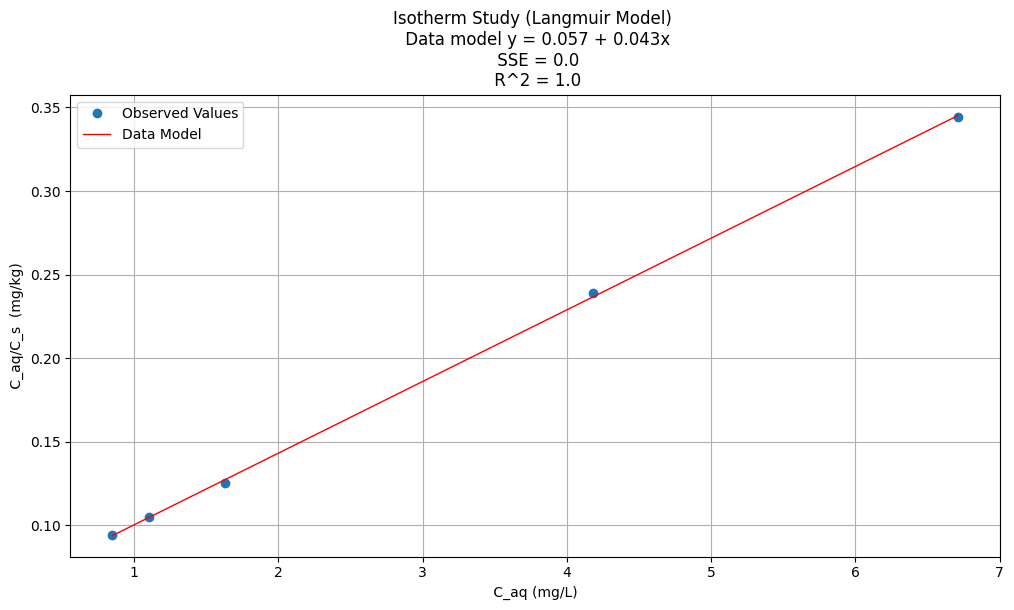

In [9]:
data = pd.DataFrame({'X':cEq, 'Y':cSoS}) # we use X,Y as column names for simplicity
#data.head()

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

# Predict values
y_pred = model.predict(data)

beta0 = model.params.iloc[0] # the fitted intercept
beta1 = model.params.iloc[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Isotherm Study (Langmuir Model) \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel(" C_aq (mg/L) ") # label x-axis
plt.ylabel(" C_aq/C_s  (mg/kg) ") # label y-axis
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)
plt.grid(which="both")
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [10]:
#
# prototype decaying species function
#
def c1dadrd(c_source,space,time,dispersion,velocity,retardation,decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrd = temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrd

In [11]:
# copy the data from the table above (cut-n-paste, then insert delimiters)
p4df = [[0 ,0.000 ,0.000],
[15 ,0.000 ,0.000],
[30 ,0.005 ,0.000],
[45 ,0.003 ,0.000],
[60 ,0.013 ,0.000],
[75 ,0.075 ,0.000],
[90 ,0.137 ,0.000],
[105 ,0.530 ,0.000],
[120 ,0.841 ,0.000],
[135 ,1.000 ,0.000],
[150 ,1.000 ,0.000],
[165 ,1.000 ,0.009],
[180 ,1.000 ,0.186],
[195 ,1.000 ,0.595],
[210 ,1.000 ,0.791],
[225 ,1.000 ,0.875],
[240 ,1.000 ,0.913],
[255 ,1.000 ,0.946],
[270 ,1.000 ,0.946],
[285 ,1.000 ,1.000],
[300 ,1.000 ,1.000],
[315 ,1.000 ,1.000],
[330 ,1.000 ,1.000],
[345 ,1.000 ,1.000],
[360 ,1.000 ,1.000]]
# count rows
howmanyrows = len(p4df)
# allocate lists
t=[0 for i in range(howmanyrows)]
bromide=[0 for i in range(howmanyrows)]
chromium=[0 for i in range(howmanyrows)]
# parse into useful lists
for irow in range(howmanyrows):
    t[irow]=p4df[irow][0]
    bromide[irow]=p4df[irow][1]
    chromium[irow]=p4df[irow][2]

if t[0]==0:t[0]=0.00001

        ---- Supplied Values ----  
                 Porosity :  0.485
            Pore Velocity :  0.244  cm/min
             Dispersivity :  0.232  cm 
 Molecular Diffusivity Br :  0.001111  cm^2/min 
 Molecular Diffusivity Cr :  0.00072  cm^2/min 
    Retardation Factor Br :  1.0
    Retardation Factor Cr :  1.9
        ---- Computed Values ----  
       Specific Discharge :  0.11834  cm/min 
               Dispersion :  0.057  cm^2/min 
               Kd-bromide :  0.0
              Kd-chromium :  0.236


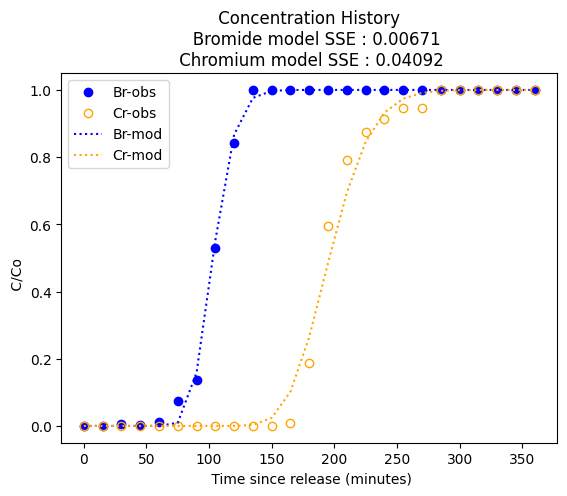

In [12]:
# input data manager
porosity = 0.485
velocity = 0.244 #cm/min
dispersivity = 0.232 #initial guess - change to fit bromide curve
retardationBr = 1.0
retardationCr = 1.9
dCr = (1.2e-09)*60*100*100 #molecular diffusivity - in cm^2/min
dBr = (1.6e-04)*100*100/1440 #molecular diffusivity in cm^2/min
spdischarge = velocity*porosity
dispersion = dispersivity*velocity
length = 25.4 #cm
diameter = 2.54 #cm
rhob = 1.85 #g/ml
#echo inputs
print("        ---- Supplied Values ----  ")
print("                 Porosity : ",porosity)
print("            Pore Velocity : ",round(velocity,3)," cm/min" )
print("             Dispersivity : ",dispersivity," cm ")
print(" Molecular Diffusivity Br : ",round(dBr,6)," cm^2/min ")
print(" Molecular Diffusivity Cr : ",round(dCr,6)," cm^2/min ")
print("    Retardation Factor Br : ",retardationBr)
print("    Retardation Factor Cr : ",retardationCr)
print("        ---- Computed Values ----  ")
print("       Specific Discharge : ",spdischarge," cm/min ")
print("               Dispersion : ",round(dispersion,3)," cm^2/min ")
print("               Kd-bromide : ",round((retardationBr-1)*(porosity/rhob),3))
print("              Kd-chromium : ",round((retardationCr-1)*(porosity/rhob),3))

# build simulation results
brmodel = [0 for i in range(howmanyrows)]
crmodel = [0 for i in range(howmanyrows)]
for irow in range(howmanyrows):
    brmodel[irow]= c1dadrd(1.0,length,t[irow],dispersion+dBr,velocity,retardationBr,0)
    crmodel[irow]= c1dadrd(1.0,length,t[irow],dispersion+dCr,velocity,retardationCr,0)
# compute some error measure
sseBr = 0.0
sseCr = 0.0
for irow in range(howmanyrows):
    sseBr = sseBr + ((bromide[irow]-brmodel[irow])**2)
    sseCr = sseCr + ((chromium[irow]-crmodel[irow])**2)
#plot simulation and observation results
from matplotlib import pyplot as plt
plt.plot(t,bromide, color='blue', linestyle = "none", marker = 'o')  # make the plot object
plt.plot(t,chromium, color='orange', linestyle = "none", marker = 'o', fillstyle = 'none')  # make the plot object
plt.plot(t,brmodel, color='blue', linestyle = "dotted" )  # make the plot object
plt.plot(t,crmodel, color='orange', linestyle = "dotted")  # make the plot object
plt.title(" Concentration History \n  " + " Bromide model SSE : " + repr(round(sseBr,5)) + "\n Chromium model SSE : " + repr(round(sseCr,5))) # caption the plot object
plt.xlabel(" Time since release (minutes)") # label x-axis
plt.ylabel(" C/Co        ") # label y-axis
#plt.xscale('log')
#plt.yscale('log')
plt.legend(["Br-obs","Cr-obs","Br-mod","Cr-mod"])
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use